In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# read csv
df = pd.read_csv('FC_Mixer_MO.csv')

# Check the first 10 register to take a grasp of what the dataset look like
df.head()

,site,division,category,line,model_name,recipe_group,uniqueid,product_code,model_complete,char_name,char_time,char_value
0,Amera,HomeEssentials,FabricConditioner,MX-FB-03,MX-FB-Visc_pred_v0.14,UNDEFINED,44168,NaN,COMPLETE,non_value_operating_time,2023-02-11 10:19:25,3560.0
1,Amera,HomeEssentials,FabricConditioner,MX-FB-03,MX-FB-Visc_pred_v0.14,UNDEFINED,44168,NaN,COMPLETE,non_value_operating_time,2023-02-11 20:49:30,300.0
2,Amera,HomeEssentials,FabricConditioner,MX-FB-03,MX-FB-Visc_pred_v0.14,UNDEFINED,44168,NaN,COMPLETE,non_value_operating_time,2023-02-12 04:28:05,190.0
3,Amera,HomeEssentials,FabricConditioner,MX-FB-03,MX-FB-Visc_pred_v0.14,UNDEFINED,44168,NaN,COMPLETE,non_value_operating_time,2023-02-12 07:41:10,140.0
4,Amera,HomeEssentials,FabricConditioner,MX-FB-03,MX-FB-Visc_pred_v0.14,UNDEFINED,44168,NaN,COMPLETE,non_value_operating_time,2023-02-12 15:19:00,640.0


In [62]:
df.describe()

,uniqueid,product_code,char_value
count,3646.000000,0.0,3646.000000
mean,45142.328579,NaN,12033.188652
std,1026.736180,NaN,20594.765449
min,44168.000000,NaN,-17615.346000
25%,44247.000000,NaN,3.234286
50%,44724.000000,NaN,920.000000
75%,45913.250000,NaN,13347.500000
max,47268.000000,NaN,229025.000000


In [63]:
print(df.dtypes)

site               object
division           object
category           object
line               object
model_name         object
recipe_group       object
uniqueid            int64
product_code      float64
model_complete     object
char_name          object
char_time          object
char_value        float64
dtype: object


In [64]:
# First of all, let's remove every column that has the same value
# Check which columns have different values

columns_to_drop = []
for col in df.columns:
    unique = df[col].unique().shape[0]
    print(f'Column {col} has {unique} unique values')
    print(f'{unique}')
    if unique == 1:
        
        columns_to_drop.append(col)

print(columns_to_drop)
df = df.drop(columns=columns_to_drop)

df.head()

Column site has 1 unique values
1
Column division has 1 unique values
1
Column category has 1 unique values
1
Column line has 1 unique values
1
Column model_name has 1 unique values
1
Column recipe_group has 1 unique values
1
Column uniqueid has 164 unique values
164
Column product_code has 1 unique values
1
Column model_complete has 2 unique values
2
Column char_name has 10 unique values
10
Column char_time has 619 unique values
619
Column char_value has 1154 unique values
1154
['site', 'division', 'category', 'line', 'model_name', 'recipe_group', 'product_code']


,uniqueid,model_complete,char_name,char_time,char_value
0,44168,COMPLETE,non_value_operating_time,2023-02-11 10:19:25,3560.0
1,44168,COMPLETE,non_value_operating_time,2023-02-11 20:49:30,300.0
2,44168,COMPLETE,non_value_operating_time,2023-02-12 04:28:05,190.0
3,44168,COMPLETE,non_value_operating_time,2023-02-12 07:41:10,140.0
4,44168,COMPLETE,non_value_operating_time,2023-02-12 15:19:00,640.0


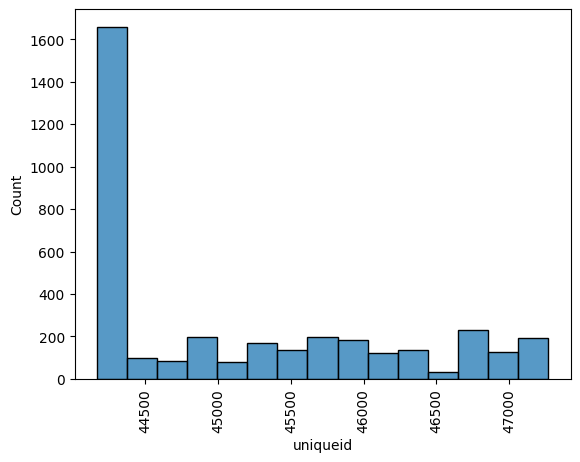

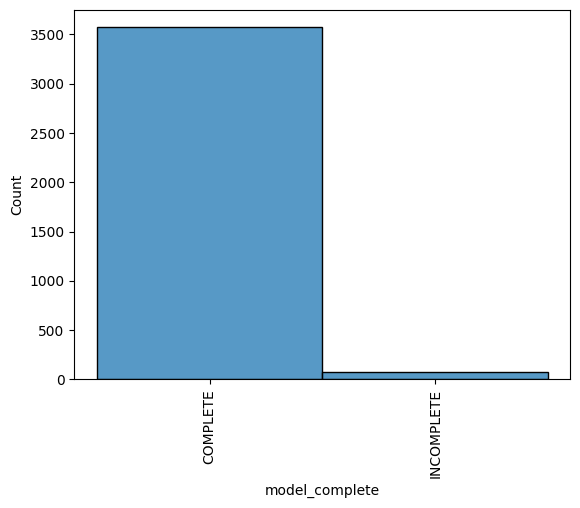

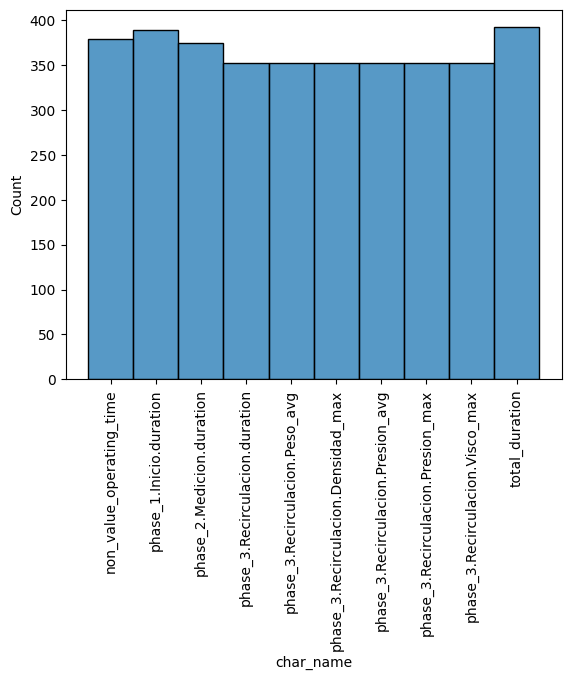

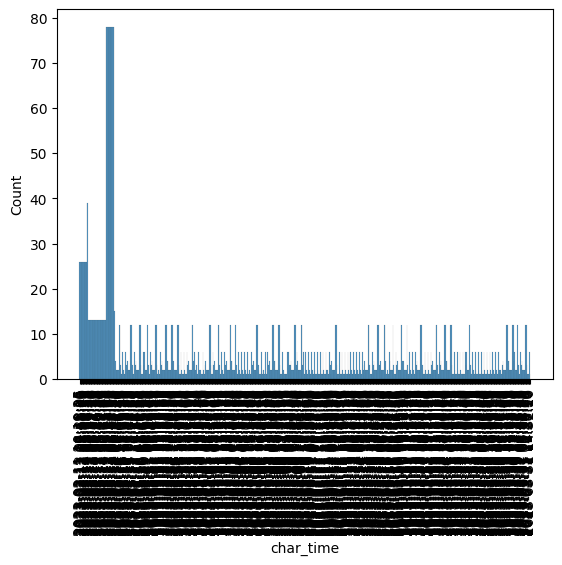

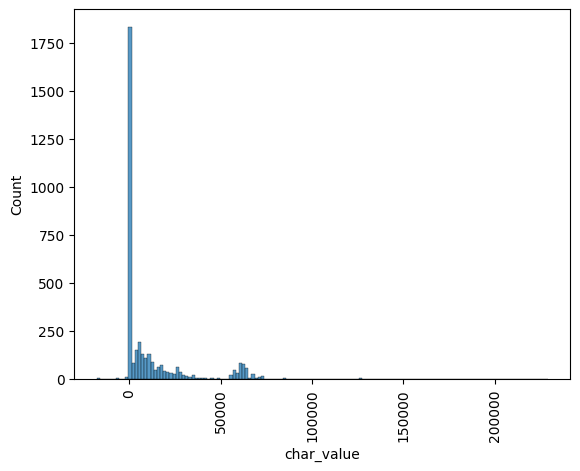

In [65]:
# Ver como estão distribuídas cada variável

# Selecionar variáveis que possam apresentar maior significância para o problema
selected_columns = df.columns
for col in selected_columns:
    # Adjust matplotlib main settings
    
    plt.xticks(rotation=90)
    sns.histplot(data=df, x=col)
    # plot figure
    plt.show()

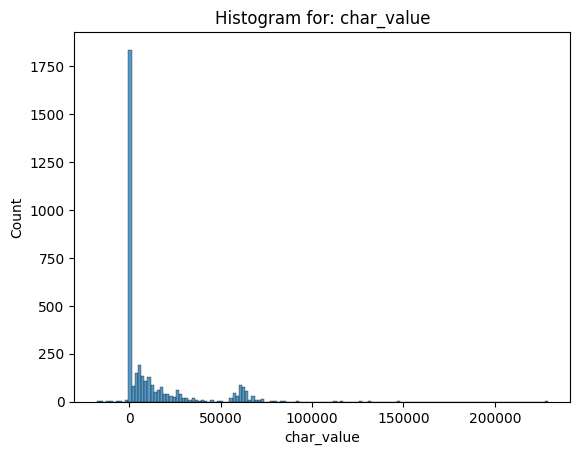

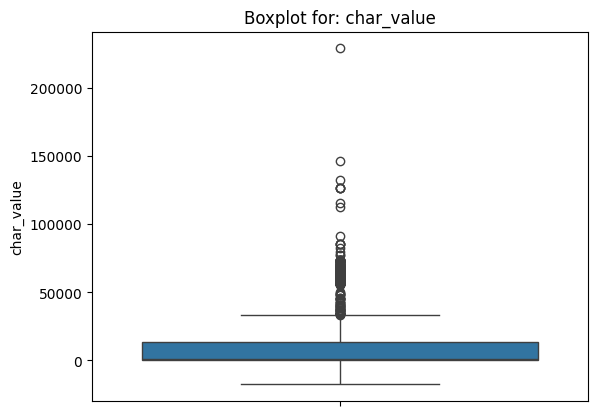

In [66]:
# Now do the same for the output variables
output_variables = ['char_value']
for var in output_variables:
    # create histogram
    plt.title(f'Histogram for: {var}')
    sns.histplot(data=df, x=var)
    plt.show()

    # create box_plot
    plt.title(f'Boxplot for: {var}')
    sns.boxplot(data=df, y=var)
    plt.show()
    

<Axes: title={'center': 'Relationship'}, xlabel='char_value', ylabel='model_complete'>

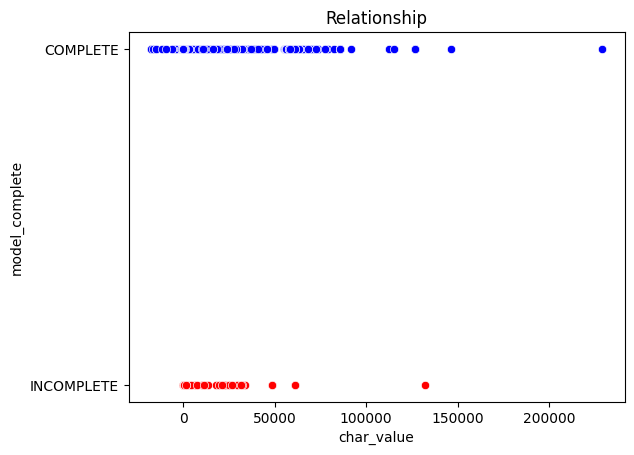

In [67]:
# Check relationship between model_complete and char_value
plt.title(f'Relationship')
sns.scatterplot(data=df[df["model_complete"] == 'COMPLETE'], x="char_value", y="model_complete", color="b")
sns.scatterplot(data=df[df["model_complete"] == 'INCOMPLETE'], x="char_value", y="model_complete", color="r")

<Axes: title={'center': 'Relationship'}, xlabel='char_name', ylabel='char_value'>

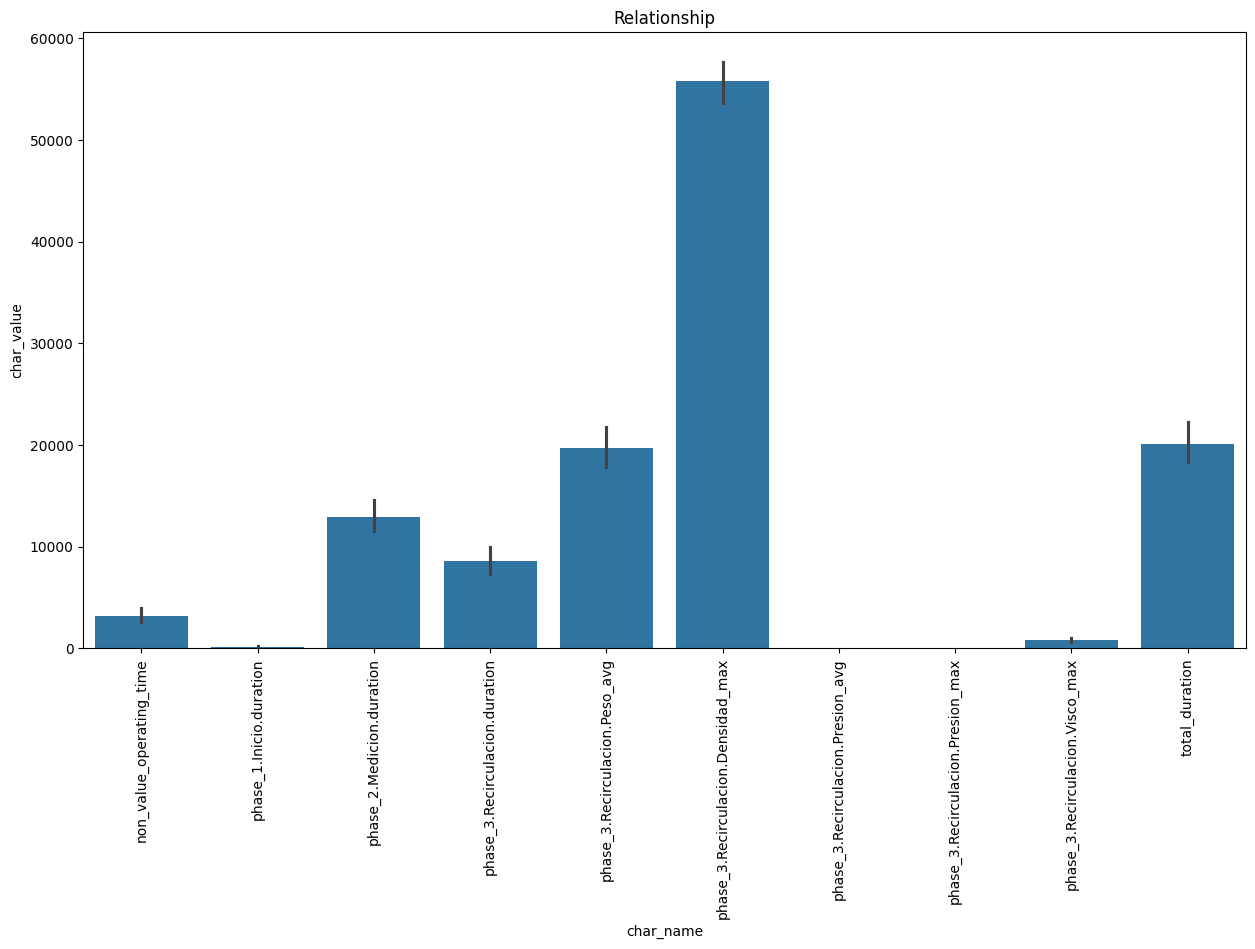

In [68]:
# Check relationship between model_complete and char_value
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
plt.title(f'Relationship')
sns.barplot(data=df, y="char_value", x="char_name")

In [71]:
df.dtypes

uniqueid            int64
model_complete     object
char_name          object
char_time          object
char_value        float64
dtype: object

In [73]:
# Let's rename those columns to better understanding
df = df.rename(columns={
    'model_complete': 'complete',
    'char_name': 'phase',
    'char_time': 'time',
    'char_value': 'value'
})

df.head()

,uniqueid,complete,phase,time,value
0,44168,COMPLETE,non_value_operating_time,2023-02-11 10:19:25,3560.0
1,44168,COMPLETE,non_value_operating_time,2023-02-11 20:49:30,300.0
2,44168,COMPLETE,non_value_operating_time,2023-02-12 04:28:05,190.0
3,44168,COMPLETE,non_value_operating_time,2023-02-12 07:41:10,140.0
4,44168,COMPLETE,non_value_operating_time,2023-02-12 15:19:00,640.0
5,44168,COMPLETE,non_value_operating_time,2023-02-12 19:51:25,115.0
6,44168,COMPLETE,non_value_operating_time,2023-02-12 23:15:40,110.0
7,44168,COMPLETE,non_value_operating_time,2023-02-13 03:05:20,110.0
8,44168,COMPLETE,non_value_operating_time,2023-02-13 06:09:20,110.0
9,44168,COMPLETE,non_value_operating_time,2023-02-13 13:30:15,24865.0


### Estrategy adopted:
Unite COMPLETE batches with the same uniqueid into a "measure". Each uniqueid will have N measures, being N the number of phases recorded at phase 0 for each uniqueid.

- Remove category columns that has 1 unique value ['site', 'division', 'category', 'line', 'model_name', 'recipe_group', 'product_code']
- Rename useful columns
- Remove INCOMPLETE measures
- Transform each uniqueid in N measures
- Set the Densidad_max variable to target

In [ ]:
# ver dps: id 45144